# Data Analysis of the Training Data

The motivation for this jupyter notebook is to answer the first question listed in the Marking Scheme:

1) *Data analysis of the training data* (15 marks): _For a written description on the training data. This should include:_
- *5 marks*: Analysis of the class labels: how frequently these are and how they correlate with any feature of the data, e.g. input length
- *10 marks*: Qualitative assessment of the dataset, considering either how hard or how subjective the task is, providing examples in your report

In [114]:
import pyarrow # required dependency of pandas
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

## Loading Data

### Data analysis of the training data

Provides plots for frequency of features of data and their correlation with the final class prediction

- `train_semeval_parids-labels.csv`: [LABELS] contains the data allocation into the train set. _Since the dev set (see below) is used for reporting performance of models, we need to create an intenal dev set from within the training data for the purpose of hyper-parameter tuning._

- `dev_semval_parids-labels.csv`: [LABELS] contains the data allocation into the dev set . _Since the test data is held out, creating an additional internal dev set allows you to use the official dev set as the test set. This is the dataset that will be used to report our findings._

- `dontpatronizeme_pcl.tsv`: [DATA] contains the test data

- `task4_test.tsv`: contains the test set (without the labels) since the original test data is held out.

#### Don't Patronize Me Data Set

Information about the contents can be found at [this link](https://github.com/CRLala/NLPLabs-2024/blob/main/Dont_Patronize_Me_Trainingset/README.txt), in short:

- `par_id` is a unique id for each one of the paragraphs in the corpus.
- `art_id` is the document id in the original NOW corpus (News on Web: https://www.english-corpora.org/now/).
- `keyword` is the search term used to retrieve texts about a target community.
- `country_code` is a two-letter ISO Alpha-2 country code for the source media outlet.
- `text` is the paragraph containing the keyword.
- `label` is an integer between 0 and 4. Each paragraph has been annotated by two annotators as 0 (No PCL), 1 (borderline PCL) and 2 (contains PCL). The combined annotations have been used in the following graded scale:

    - 0 -> $A_1 = 0 \wedge A_2 = 0$
    - 1 -> $A_1 = 0 \wedge A_2 = 1$ OR $A_1 = 1 \wedge A_2 = 0$
    - 2 -> $A_1 = 1 \wedge A_2 = 1$
    - 3 -> $A_1 = 1 \wedge A_2 = 2$ OR $A_1 = 2 \wedge A_2 = 1$
    - 4 -> $A_1 = 2 \wedge A_2 = 2$

The experiments reported in the paper consider the following tag grouping: 
- {0,1}   = No PCL
- {2,3,4} = PCL

In [2]:
data_path = '../../data'

dont_patronize_me = pd.read_csv(f'{data_path}/dontpatronizeme_pcl.tsv', delimiter='\t', skiprows=4, header=None, names=['par_id','art_id','keyword','country_code', 'text','label'])
dont_patronize_me.shape

(10469, 6)

In [3]:
dont_patronize_me.loc[dont_patronize_me['label']==0].head(5)

,par_id,art_id,keyword,country_code,text,label
0,1,@@24942188,hopeless,ph,"We 're living in times of absolute insanity , ...",0
1,2,@@21968160,migrant,gh,"In Libya today , there are countless number of...",0
2,3,@@16584954,immigrant,ie,White House press secretary Sean Spicer said t...,0
3,4,@@7811231,disabled,nz,Council customers only signs would be displaye...,0
4,5,@@1494111,refugee,ca,""" Just like we received migrants fleeing El Sa...",0


In [4]:
dont_patronize_me.loc[dont_patronize_me['label']==1].head(5)

,par_id,art_id,keyword,country_code,text,label
8,9,@@3449225,homeless,ph,"NUEVA ERA , Ilocos Norte - No family shall be ...",1
35,36,@@20493025,homeless,ng,The foundation urged those who are willing to ...,1
37,38,@@19143133,hopeless,bd,Rizvi : There will be no joy this Eid <h> ' Th...,1
43,44,@@20860277,vulnerable,ng,Comrade David Kerigbo Ugondo was born to the f...,1
44,45,@@4002879,refugee,us,"Currently , what 's left to the Palestinian pe...",1


In [5]:
dont_patronize_me.loc[dont_patronize_me['label']==2].head(5)

,par_id,art_id,keyword,country_code,text,label
32,33,@@8301323,disabled,pk,Arshad said that besides learning many new asp...,2
148,149,@@1387882,disabled,us,Krueger recently harnessed that creativity to ...,2
170,171,@@18450304,women,bd,""" I am very excited to see the monetary result...",2
178,179,@@15574765,women,ca,"Jenny Neal , regional director of the Grandmot...",2
237,238,@@21800857,hopeless,bd,""" This system appears designed to make Rohingy...",2


In [6]:
dont_patronize_me.loc[dont_patronize_me['label']==3].head(5)

,par_id,art_id,keyword,country_code,text,label
33,34,@@24150149,disabled,ng,Fast food employee who fed disabled man become...,3
41,42,@@4591694,hopeless,jm,Vanessa had feelings of hopelessness in her fi...,3
76,77,@@22454828,homeless,nz,"In September , Major Nottle set off on foot fr...",3
82,83,@@4672144,homeless,pk,The demographics of Pakistan and India are ver...,3
106,107,@@16900972,homeless,ke,"His present "" chambers "" may be quite humble ,...",3


In [7]:
dont_patronize_me.loc[dont_patronize_me['label']==4].head(5)

,par_id,art_id,keyword,country_code,text,label
117,118,@@24885862,in-need,za,This is the rhetoric of what anthropologist La...,4
153,154,@@20663936,disabled,ng,When some people feel causing problem for some...,4
156,157,@@21712008,poor-families,ca,We are alarmed to learn of your recently circu...,4
186,187,@@24814760,in-need,bd,""" We share a global responsibility to respond ...",4
194,195,@@4478900,homeless,gb,Housing Minister Grant Shapps added : ' The pl...,4


In [8]:
dont_patronize_me.groupby('label').size().reset_index(name='count')

,label,count
0,0,8529
1,1,947
2,2,144
3,3,458
4,4,391


#### Parids-labels

These files contain mappings from a sentence id to a `(7,)` vector. The labels can be found at the [original research paper](https://aclanthology.org/2020.coling-main.518/) and from their [GitHub repository](https://github.com/Perez-AlmendrosC/dontpatronizeme/tree/master) where more details can be found with regards to their meaning. In short, the labels are:

- Unbalanced Power Relation
- Shallow solution
- Presupposition 
- Authority voice
- Metaphor
- Compassion
- The poorer, the merrier

This corresponds to the dont_patronize_me dataset where it encodes what type of patronizing language is used


In [9]:
# Loading the training labelled dataset

train = pd.read_csv(f'{data_path}/train_semeval_parids-labels.csv', delimiter=',')
train.shape

(8375, 2)

In [10]:
train.head(5)

,par_id,label
0,4341,"[1, 0, 0, 1, 0, 0, 0]"
1,4136,"[0, 1, 0, 0, 0, 0, 0]"
2,10352,"[1, 0, 0, 0, 0, 1, 0]"
3,8279,"[0, 0, 0, 1, 0, 0, 0]"
4,1164,"[1, 0, 0, 1, 1, 1, 0]"


In [11]:
# Loading the training labelled dataset

dev = pd.read_csv(f'{data_path}/dev_semeval_parids-labels.csv', delimiter=',')
dev.shape

(2094, 2)

In [12]:
train.shape[0] + dev.shape[0] == dont_patronize_me.shape[0]

True

#### Joined Data

In [15]:
detailed_labels = pd.concat([dev, train], ignore_index=True, join='inner', names=['simple', 'detailed'])
joined_df = pd.merge(dont_patronize_me, detailed_labels, on='par_id')
joined_df = joined_df.rename(columns={'label_x': 'label', 'label_y': 'label_detailed'})

In [16]:
joined_df.loc[joined_df['label']==0].head(5)

,par_id,art_id,keyword,country_code,text,label,label_detailed
0,1,@@24942188,hopeless,ph,"We 're living in times of absolute insanity , ...",0,"[0, 0, 0, 0, 0, 0, 0]"
1,2,@@21968160,migrant,gh,"In Libya today , there are countless number of...",0,"[0, 0, 0, 0, 0, 0, 0]"
2,3,@@16584954,immigrant,ie,White House press secretary Sean Spicer said t...,0,"[0, 0, 0, 0, 0, 0, 0]"
3,4,@@7811231,disabled,nz,Council customers only signs would be displaye...,0,"[0, 0, 0, 0, 0, 0, 0]"
4,5,@@1494111,refugee,ca,""" Just like we received migrants fleeing El Sa...",0,"[0, 0, 0, 0, 0, 0, 0]"


In [17]:
joined_df.loc[joined_df['label']==4].head(5)

,par_id,art_id,keyword,country_code,text,label,label_detailed
117,118,@@24885862,in-need,za,This is the rhetoric of what anthropologist La...,4,"[1, 0, 0, 1, 0, 1, 0]"
153,154,@@20663936,disabled,ng,When some people feel causing problem for some...,4,"[0, 0, 1, 1, 1, 1, 0]"
156,157,@@21712008,poor-families,ca,We are alarmed to learn of your recently circu...,4,"[1, 1, 0, 0, 1, 1, 0]"
186,187,@@24814760,in-need,bd,""" We share a global responsibility to respond ...",4,"[1, 0, 0, 0, 0, 0, 0]"
194,195,@@4478900,homeless,gb,Housing Minister Grant Shapps added : ' The pl...,4,"[1, 0, 0, 1, 0, 0, 0]"


## Data Pre-processing

In [ ]:
joined_df[pd.isna(joined_df['text'])]

,par_id,art_id,keyword,country_code,text,label,label_detailed
8639,8640,@@16852855,migrant,ke,NaN,0,"[0, 0, 0, 0, 0, 0, 0]"


In [ ]:
joined_df = joined_df.dropna(subset = 'text')
joined_df[pd.isna(joined_df['text'])]

,par_id,art_id,keyword,country_code,text,label,label_detailed


In [ ]:
joined_df.loc[:, 'is_patronizing'] = False
joined_df.loc[joined_df['label'].isin([2,3,4]), 'is_patronizing'] = True

## Data Analysis

### Word frequency analysis

In [149]:
# Count word frequency per label_simple

# Obtain word count
word_frequency_analysis = joined_df[['text', 'label']]
word_frequency_analysis.loc[:, ('text')] = joined_df['text'].str.lower().str.split(' ', expand=False)
word_frequency_analysis.loc[:, ('text')] = word_frequency_analysis['text'].apply(lambda x: Counter(x))

def foo(x):
    result = Counter()
    for d in x:
        result += Counter(d)
    return dict(sorted(result.items(), key=lambda item: item[1], reverse=True))

# group by label
grouped_df = word_frequency_analysis.groupby('label')['text'].agg(foo).reset_index()

In [150]:
dict_for_0 = grouped_df[grouped_df['label'] == 0]['text'].iloc[0]

### Length Analysis

In [187]:
def plot_histogram_for_sentence_length(dataset, labels):
    """Plots a histogram for a specific label(s)"""
    # Create a new figure
    plt.figure(figsize=(10, 6))    

    # Loop through unique labels and plot the data
    for label, data in dataset[dataset['label'].isin(labels)].groupby('label'):
        plt.hist(data['text'], bins=50, alpha=0.5, label=label)

    # Set labels and title
    plt.xlabel('Text Length')
    plt.ylabel('Frequency')
    plt.title('Text Length Distribution by Label')

    # Add legend
    plt.legend()

    # Show the plot
    plt.show()


In [194]:
def plot_histogram_for_sentence_length_by_patronizing(dataset):
    """Now, instead, plot the labels which are considered to be not patronizing (0,1) and patronizing (2,3,4) as discussed in the spec"""
    # Create a new figure
    plt.figure(figsize=(10, 6))    
    
    # Loop through unique labels and plot the data
    for label, data in dataset.groupby('is_patronizing'):
        plt.hist(data['text'], bins=50, alpha=0.5, label=label)

    # Set labels and title
    plt.xlabel('Text Length')
    plt.ylabel('Frequency')
    plt.title('Text Length Distribution by Binary Patronizing Identification')

    # Add legend
    plt.legend()

    # Show the plot
    plt.show()

In [196]:
def plot_line_bar_for_sentence_length(dataset, labels=[0,1,2,3,4]):
    # Create a new figure
    plt.figure(figsize=(10, 6))

    # Plot individual data points on the number line
    for index, row in dataset.loc[dataset['label'].isin(labels)].iterrows():
        plt.plot(row['text'], row['label'], 'o', color='C0', alpha=0.7)

    # Set labels and title
    plt.xlabel('Text Length')
    plt.yticks([0, 1, 2, 3, 4])  # Set y-axis ticks to label names
    plt.ylabel('Label')
    plt.title('Text Length Distribution by Label')

    # Show the plot
    plt.show()

In [198]:
def plot_line_bar_for_sentence_length_by_patronizing(dataset):
    # Create a new figure
    plt.figure(figsize=(10, 6))

    # Plot individual data points on the number line
    for _, row in dataset.iterrows():
        label = 'Patronizing' if row['is_patronizing'] else 'Not Patronizing'
        plt.plot(row['text'], 1 if row['is_patronizing'] else 0, 'o', label=label, color='C0', alpha=0.7)

    # Set labels and title
    plt.xlabel('Text Length')
    plt.yticks([0, 1], ['Not Patronizing', 'Patronizing'])  # Set y-axis ticks to label names
    plt.ylabel('Label')
    plt.title('Text Length Distribution by Patronizing')

    # tighten gap
    plt.ylim(-1, 2)

    # Show the plot
    plt.show()

#### Character Count

In [156]:
character_count = joined_df[['text', 'label','is_patronizing']]
character_count.loc[:, ('text')] = character_count['text'].apply(lambda x: len(x))
# pd.merge(joined_df, character_count, on='par_id').iloc[0][['text_x']]

character_count.sort_values(by='text')

,text,label,is_patronizing
1656,8,0,False
9063,16,1,False
8079,18,0,False
1954,18,0,False
6020,20,1,False
...,...,...,...
292,1500,0,False
8191,2240,0,False
5977,2336,1,False
6832,2776,4,True


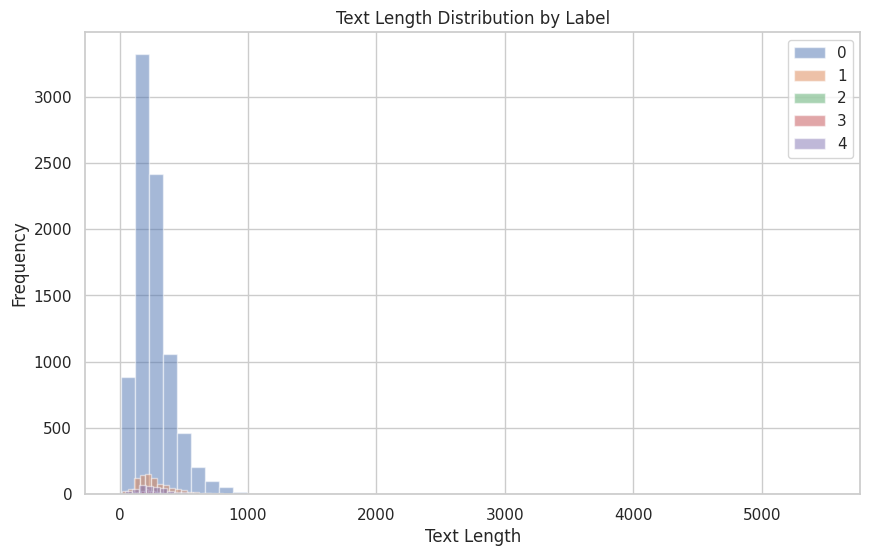

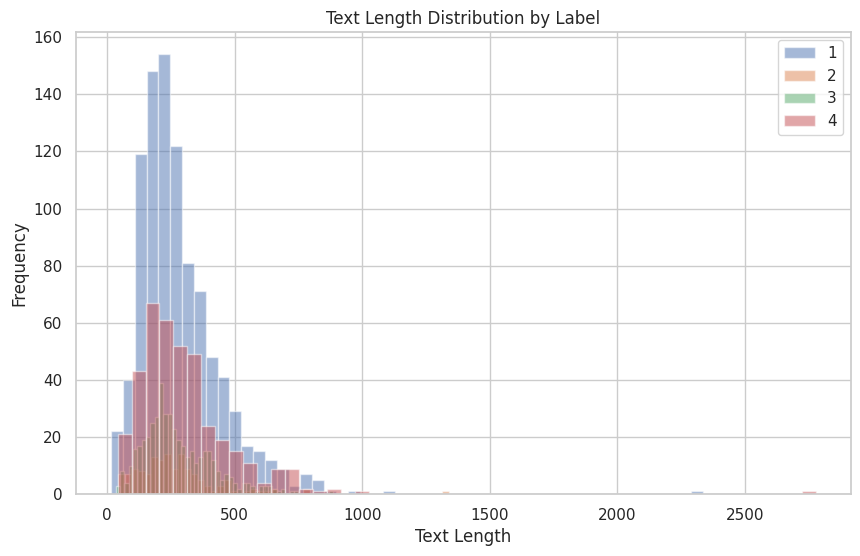

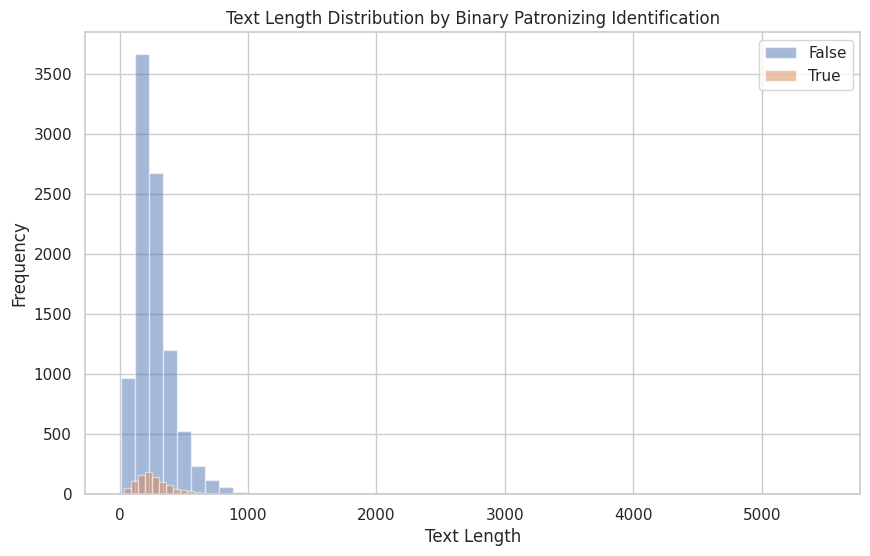

In [205]:
plot_histogram_for_sentence_length(character_count, [0,1,2,3,4])
plot_histogram_for_sentence_length(character_count, [1,2,3,4])
plot_histogram_for_sentence_length_by_patronizing(character_count)

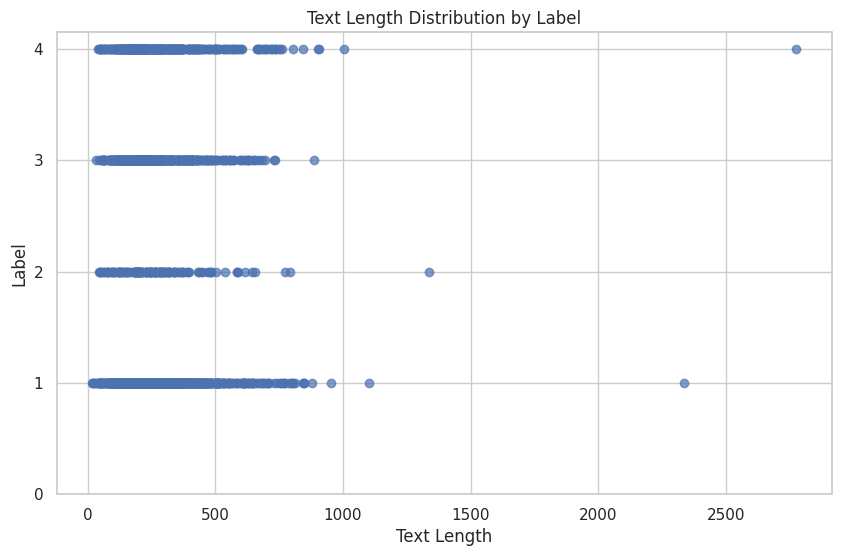

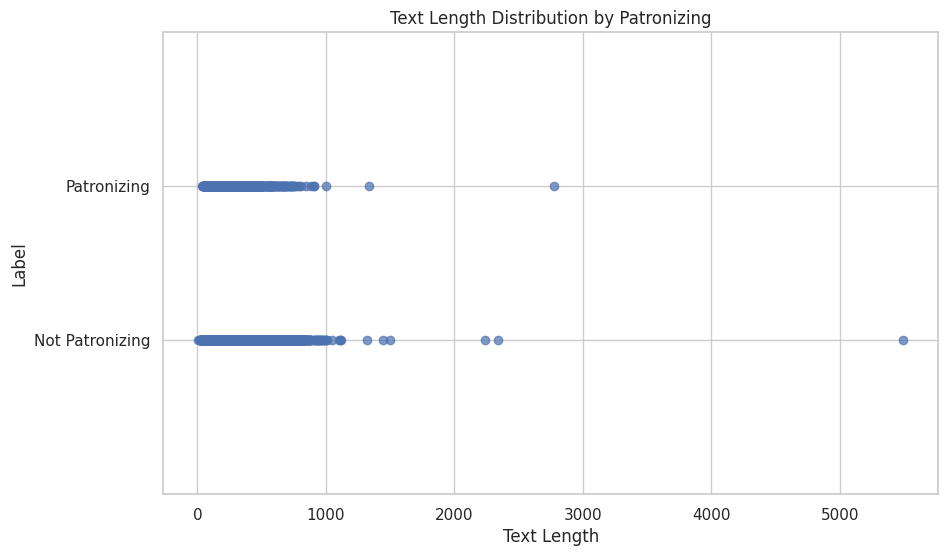

In [204]:
plot_line_bar_for_sentence_length(character_count, [1,2,3,4])
plot_line_bar_for_sentence_length_by_patronizing(character_count)

#### Word count

In [200]:
word_count = joined_df[['text', 'label','is_patronizing']]
word_count.loc[:, ('text')] = word_count['text'].apply(lambda x: len(x.split(' ')))

word_count.sort_values(by='text')

,text,label,is_patronizing
1656,1,0,False
9063,2,1,False
6020,3,1,False
1954,3,0,False
317,3,0,False
...,...,...,...
9810,272,0,False
8191,390,0,False
5977,419,1,False
6832,512,4,True


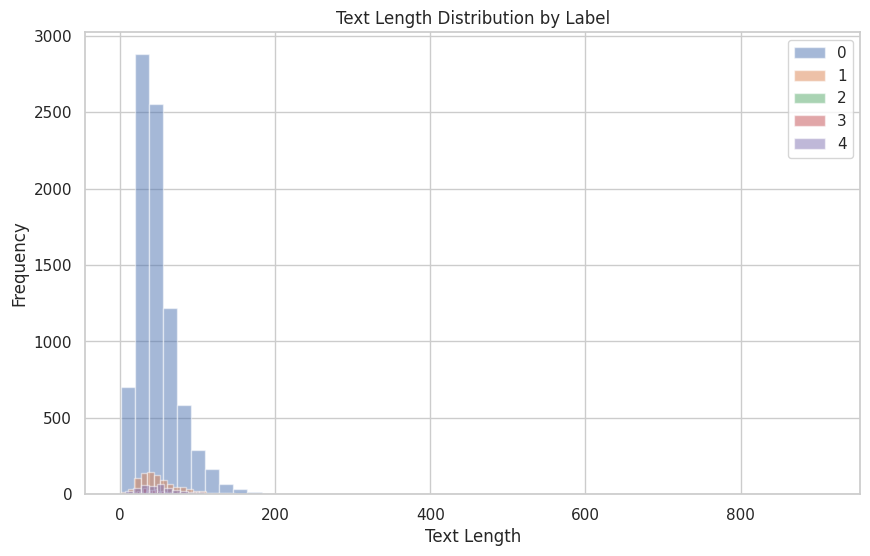

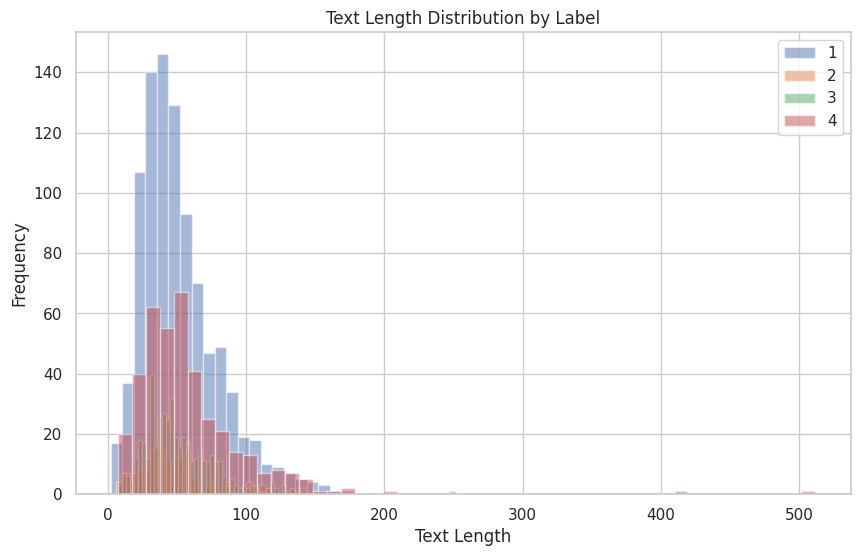

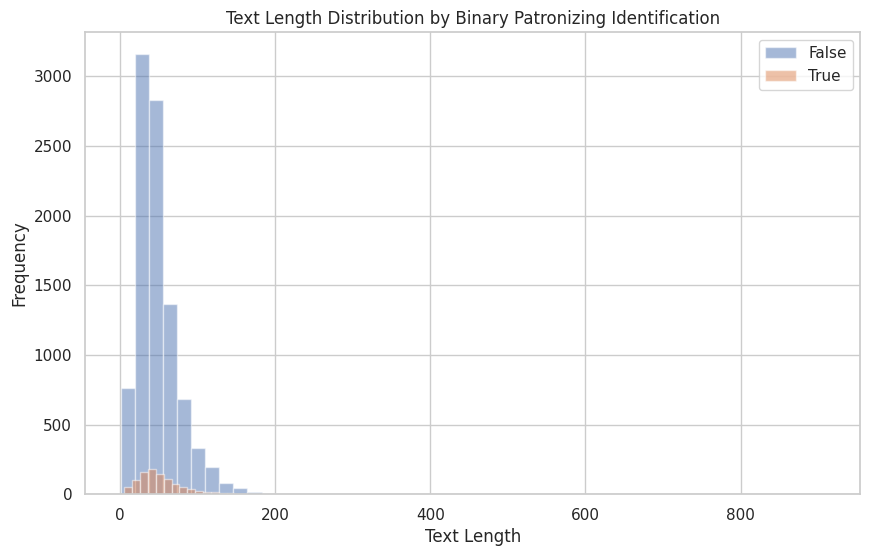

In [203]:
plot_histogram_for_sentence_length(word_count, labels=[0,1,2,3,4])
plot_histogram_for_sentence_length(word_count, labels=[1,2,3,4])
plot_histogram_for_sentence_length_by_patronizing(word_count)

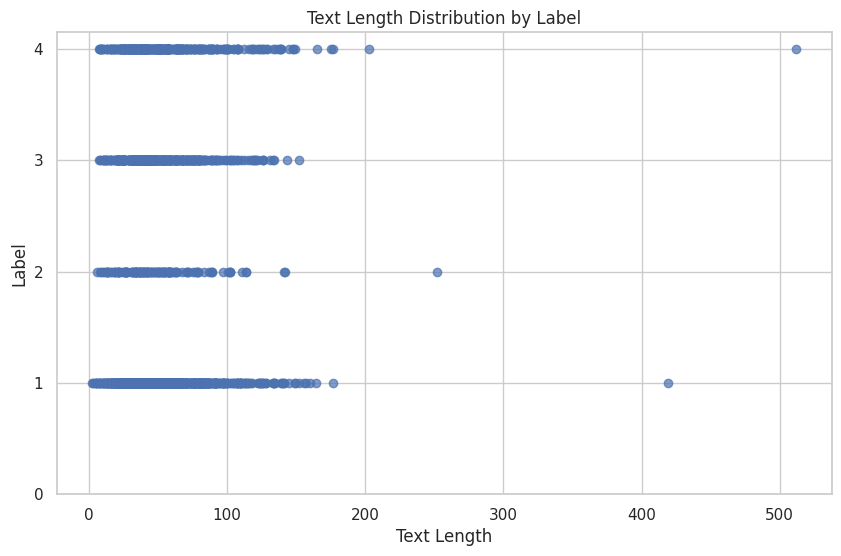

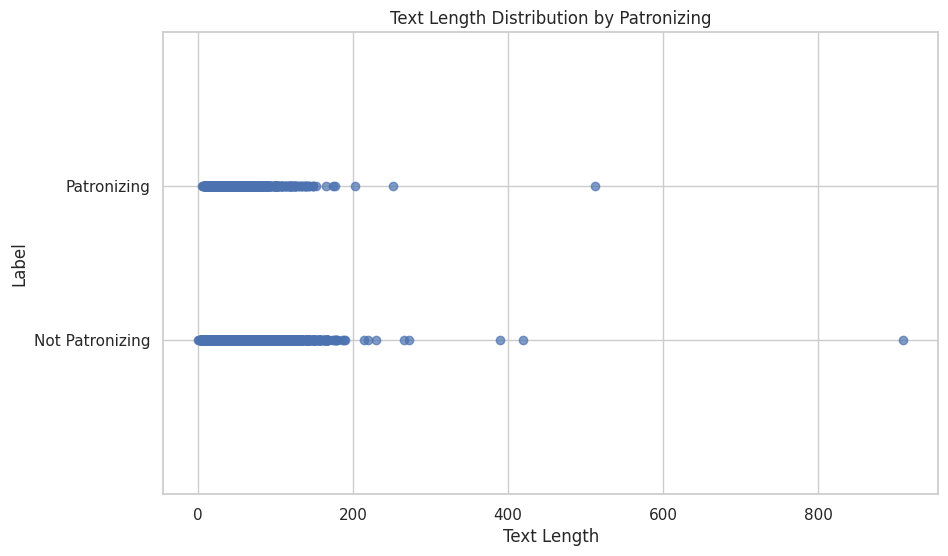

In [206]:
plot_line_bar_for_sentence_length(word_count, [1,2,3,4])
plot_line_bar_for_sentence_length_by_patronizing(word_count)